In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

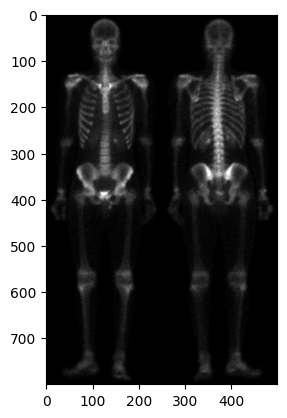

In [72]:
image = cv2.imread('skeleton.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')
plt.show()

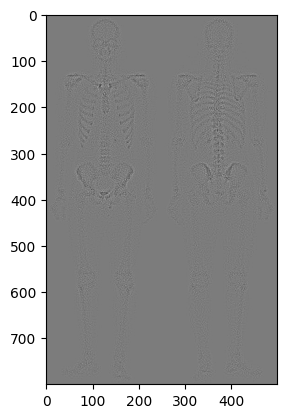

In [75]:
image2 = cv2.Laplacian(image, cv2.CV_64F)
image2 = cv2.normalize(image2,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(image2, cmap='gray')
plt.show()

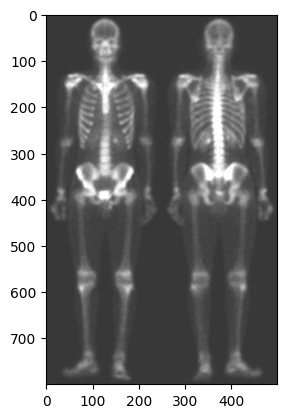

In [79]:
image3 = cv2.add(image.astype(np.uint8), image2.astype(np.uint8))
image3 = cv2.normalize(image3,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(image3, cmap = 'gray')
plt.show()

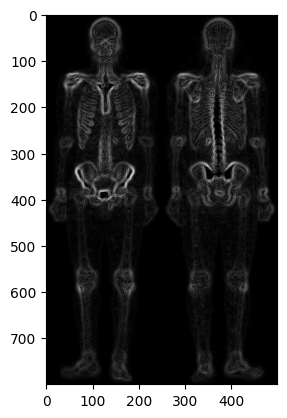

In [88]:
image_x = cv2.Sobel(image3, cv2.CV_64F, 1, 0, ksize=5)
image_y = cv2.Sobel(image3, cv2.CV_64F, 0, 1, ksize=5)
image4 = np.sqrt(image_x**2 + image_y**2)
plt.imshow(image4, cmap = 'gray')
plt.show()

In [57]:
def gamma_correction(image, gamma):
    normalized_image = image / 255.0
    corrected_image = np.power(normalized_image, gamma)
    corrected_image = (corrected_image * 255).astype(np.uint64)
    return corrected_image

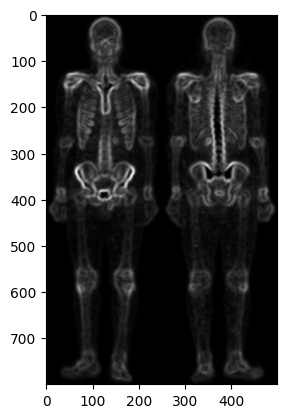

In [89]:
image5 = cv2.blur(image4,(5,5))
plt.imshow(image5, cmap = 'gray')
plt.show()

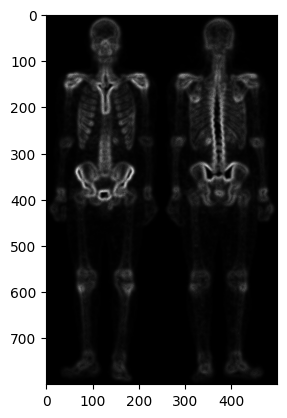

In [96]:
mask = cv2.multiply(image3.astype(np.uint64), image5.astype(np.uint64))
image6 = cv2.normalize(mask,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(image6, cmap = 'gray')
plt.show()

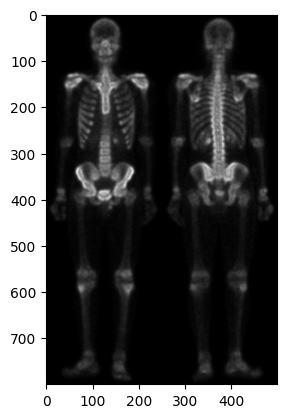

In [97]:
image7 = cv2.normalize(image + image6,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(image7, cmap = 'gray')
plt.show()

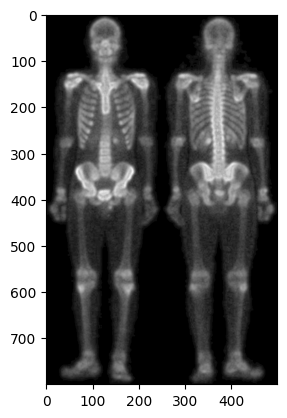

In [98]:
image8 = gamma_correction(image7, 0.5)
plt.imshow(image8, cmap = 'gray')
plt.show()

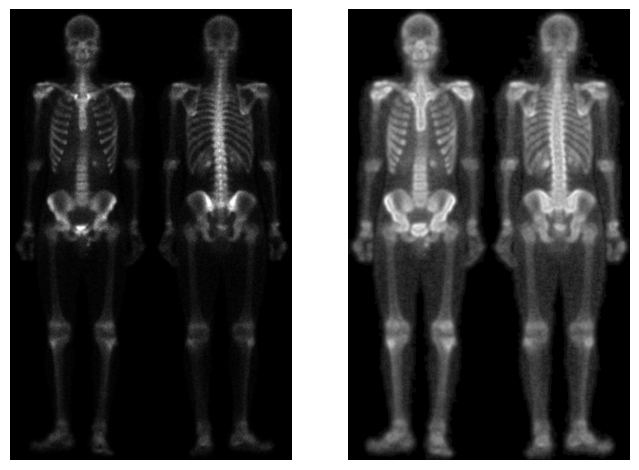

In [99]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image8, cmap='gray')
plt.axis('off')

plt.show()